# Embedding Viz

Simple example of how to create embeddings for JSON files and processing them to plot in 2D using the t-SNE technique for dim reduction.

In [47]:
import json, glob, os
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

Using the simplest embedding model [all-MiniLM-L6-v2](https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2). Will definitely have to search for more appropriate embedding models later.

In [48]:
json_dir = "../src/"
model_name = "all-MiniLM-L6-v2" # small,good enough

Create embeddings

In [53]:
file_names = []
corpus = []
for fp in glob.glob(os.path.join(json_dir, "*.json")):
    with open(fp, encoding="utf-8") as f:
        data = json.load(f)
    file_name = os.path.basename(fp)
    file_names.append(file_name.replace(".json", ""))
    content = {k: v for k, v in data.items() if k != "file"}
    corpus.append(json.dumps(content, ensure_ascii=False))

In [50]:
model = SentenceTransformer(model_name)
embeddings = model.encode(corpus, show_progress_bar=True)

Batches: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]


Reduce to 2D using t-SNE

In [54]:
tsne = TSNE(n_components=2, init="random", random_state=42, perplexity=embeddings.shape[0]-1)
coords = tsne.fit_transform(embeddings)

x, y = coords[:, 0], coords[:, 1]
df = pd.DataFrame({"file": file_names, "x": x, "y": y})

Plot results

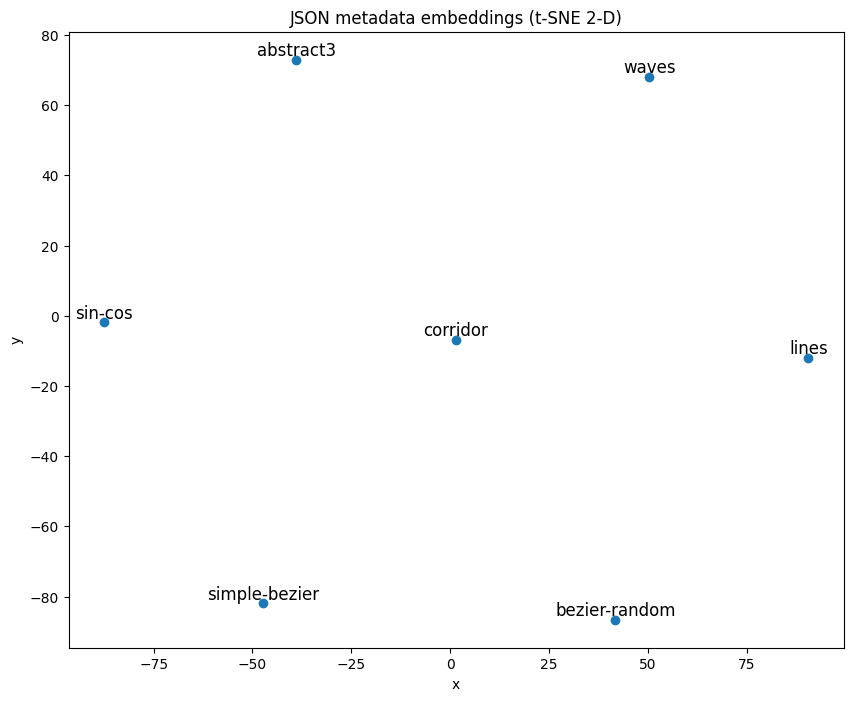

In [55]:
plt.figure(figsize=(10, 8))
plt.scatter(df['x'], df['y'])

for _, row in df.iterrows():
    plt.text(row['x'], row['y'], row['file'], fontsize=12, ha='center', va='bottom')

plt.title("JSON metadata embeddings (t-SNE 2-D)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()